# Data Extraction

In [1]:
import re

import pandas as pd
import numpy as np
from gedcom5.parser import GEDCOM5Parser

from common import year

In [2]:
parser = GEDCOM5Parser()

with open("data/royal92.ged") as f:
    gedcom = parser.parse_string(f.read())

## Births

In [3]:
def iterator():
    for indi in gedcom.indi:
        for birt in indi.birt:
            date = birt.date.value if birt.date is not None else ""
            plac = birt.plac.value if birt.plac is not None else ""

            yield indi.xref_id, date, plac


df_birth = pd.DataFrame(
    data=iterator(),
    columns=["indi", "date", "plac"],
)
df_birth["year"] = df_birth["date"].apply(year).astype("Int64")
df_birth.to_csv("data/birth.csv", index=False)
df_birth

,indi,date,plac,year
0,@I1@,24 MAY 1819,"Kensington,Palace,London,England",1819
1,@I2@,26 AUG 1819,"Schloss Rosenau,Near Coburg,Germany",1819
2,@I3@,21 NOV 1840,"Buckingham,Palace,London,England",1840
3,@I4@,9 NOV 1841,"Buckingham,Palace,London,England",1841
4,@I5@,25 APR 1843,"Buckingham,Palace,London,England",1843
...,...,...,...,...
1734,@I2997@,3 JAN 1907,,1907
1735,@I2998@,4 JAN 1912,,1912
1736,@I3004@,,"Florence,Italy",<NA>
1737,@I3006@,1879,,1879


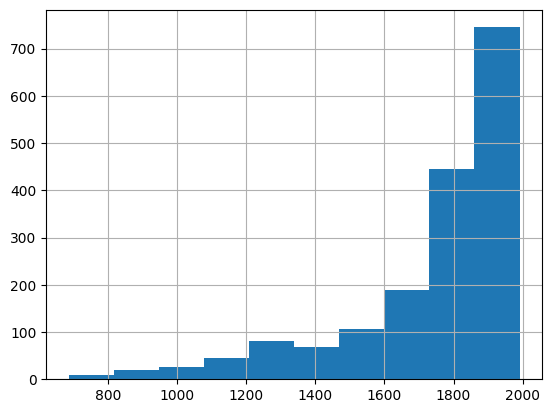

In [4]:
df_birth.year.hist();

## Deaths

In [5]:
def iterator():
    for indi in gedcom.indi:
        for deat in indi.deat:
            date = deat.date.value if deat.date is not None else ""
            plac = deat.plac.value if deat.plac is not None else ""
            yield indi.xref_id, date, plac


df_death = pd.DataFrame(
    data=iterator(),
    columns=["indi", "date", "plac"],
)
df_death["year"] = df_death["date"].apply(year).astype("Int64")
df_death.to_csv("data/death.csv", index=False)
df_death

,indi,date,plac,year
0,@I1@,22 JAN 1901,"Osborne House,Isle of Wight,England",1901
1,@I2@,14 DEC 1861,"Windsor Castle,Berkshire,England",1861
2,@I3@,5 AUG 1901,"Friedrichshof,Near,Kronberg,Taunus",1901
3,@I4@,6 MAY 1910,"Buckingham,Palace,London,England",1910
4,@I5@,14 DEC 1878,"Darmstadt,,,Germany",1878
...,...,...,...,...
1687,@I2995@,27 MAY 1917,,1917
1688,@I2997@,30 MAY 1940,"Nr Cassel,France",1940
1689,@I2998@,29 MAY 1940,,1940
1690,@I3004@,BEF 1877,,1877


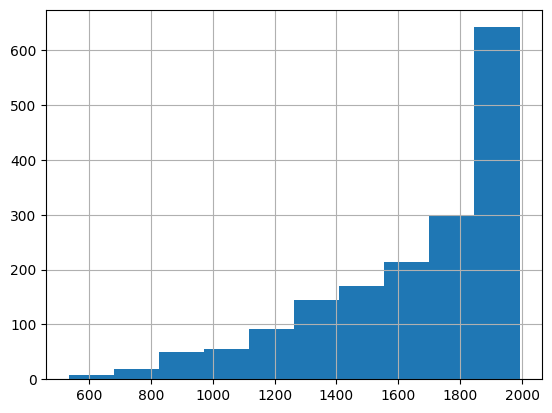

In [6]:
df_death.year.hist();

## Marriages

In [7]:
def iterator():
    for fam in gedcom.fam:
        husb = fam.husb.value if fam.husb is not None else np.nan
        wife = fam.wife.value if fam.wife is not None else np.nan

        for marr in fam.marr:
            date = marr.date.value if marr.date is not None else np.nan
            plac = marr.plac.value if marr.plac is not None else np.nan
            yield husb, wife, date, plac


df_marriage = pd.DataFrame(
    data=iterator(),
    columns=["husb", "wife", "date", "plac"],
)
df_marriage["year"] = df_marriage["date"].apply(year).astype("Int64")
df_marriage.to_csv("data/marriage.csv", index=False)
df_marriage

,husb,wife,date,plac,year
0,@I2@,@I1@,10 FEB 1840,"Chapel Royal,St. James Palace,England",1840
1,@I4@,@I12@,10 MAR 1863,"St. George Chap.,Windsor,,England",1863
2,@I20@,@I3@,25 JAN 1858,"London,England",1858
3,@I37@,@I39@,26 NOV 1894,"Winter Palace,,St. Petersburg,Russia",1894
4,@I10@,@I23@,27 APR 1882,"St. George Chap.,Windsor,,England",1882
...,...,...,...,...,...
551,@I54@,@I2977@,17 DEC 1978,NaN,1978
552,@I109@,@I2979@,AFT 1989,NaN,1989
553,@I2985@,@I243@,ABT 1947,NaN,1947
554,@I2986@,@I806@,28 DEC 1936,"Guildhall,London,England",1936


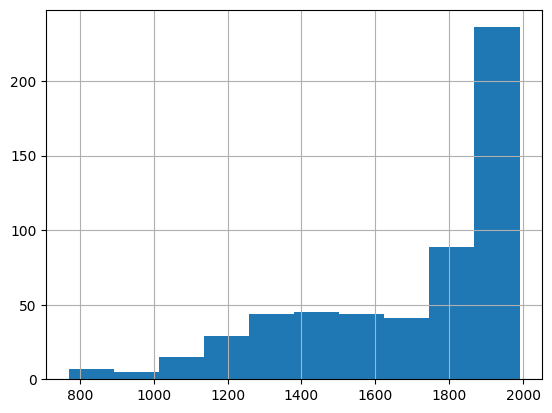

In [8]:
df_marriage.year.hist();